# Wheat Seeds 2
## Load packages

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Draw Decision Regions Function

In [46]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

# Data Preprocessing
## Download the Wheat Seed dataset from the given link

In [47]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
path = '/content/seeds_dataset.txt'

--2023-02-20 23:46:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [application/x-httpd-php]
Saving to: ‘seeds_dataset.txt.2’

seeds_dataset.txt.2 100%[===================>]   9.08K  --.-KB/s    in 0s      

2023-02-20 23:46:37 (144 MB/s) - ‘seeds_dataset.txt.2’ saved [9300/9300]



## Read Wheat Seed Data with all features and target values

In [48]:
features = ['Area',
            'Perimeter',
            'Compactness',
            'Length of kernel',
            'Width of kernel',
            'Asymmetry coefficient',
            'Length of kernel groove.']

df = pd.read_csv(path, delimiter=r'[\t]+',
                 names=features + ['target'])
display(df)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove.,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


### Separate features as X and target as y

In [49]:
X = df.loc[:, features]
original_X = df.loc[:, features]
y = df.loc[:, 'target']
np.random.seed(10)

## Classify using the original data

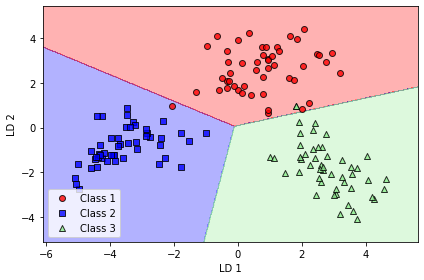

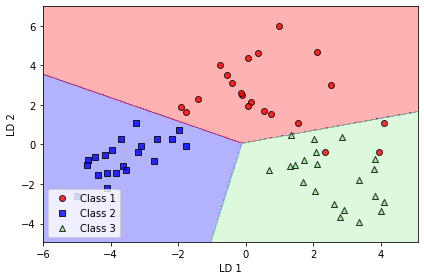

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0)

scaler = StandardScaler()

X_train_std = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

X_test_std = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)

plt.figure()
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.figure()
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Manipulate the original data
### Select random %5 of cells and replace their value with NaN

In [51]:
percentage = 0.05
X[np.random.random(X.shape) > 1 - percentage] = np.nan

display(X.head(50).fillna('_'))

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove.
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22
1,14.88,14.57,0.8811,5.554,_,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219
7,14.11,14.1,0.8911,5.42,3.302,2.7,5.0
8,_,15.46,0.8747,6.053,3.465,2.04,5.877
9,16.44,15.25,0.888,5.884,3.505,1.969,5.533


In [52]:
print()
print('─' * 150)  # U+2500, Box Drawings Light Horizontal
print('\n1. Number of NaN cells generated for each feature:\n')
display(pd.DataFrame(X.isnull().sum(0)).T)
print()
print('─' * 150)  # U+2500, Box Drawings Light Horizontal
print('\n2. Number of NaN features generated for each wine samples:\n')
display(pd.DataFrame(X.isnull().sum(1)).T)
print()
print('─' * 150)  # U+2500, Box Drawings Light Horizontal
print('\n3. Showing all the rows and features with NaN value:\n')
display(X[np.isin(X.isnull(), 1)].fillna('_').head(50))



──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

1. Number of NaN cells generated for each feature:



,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove.
0,15,8,9,7,10,9,10



──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

2. Number of NaN features generated for each wine samples:



,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,0,1,0,0,0,0,0,0,1,0,...,0,2,0,0,0,0,1,2,0,0



──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

3. Showing all the rows and features with NaN value:



,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove.
1,14.88,14.57,0.8811,5.554,_,1.018,4.956
8,_,15.46,0.8747,6.053,3.465,2.04,5.877
13,13.78,14.06,_,5.479,3.156,_,4.872
13,13.78,14.06,_,5.479,3.156,_,4.872
19,12.72,13.57,0.8686,5.226,3.049,4.102,_
30,13.16,13.82,_,5.454,2.975,0.8551,5.056
35,16.12,15.0,0.9,_,3.485,2.27,5.443
37,17.08,15.38,0.9079,5.832,_,2.956,5.484
38,14.8,_,0.8823,5.656,_,3.112,5.309
38,14.8,_,0.8823,5.656,_,3.112,5.309


## Comparison and Impute
### Compare the original dataframe with the manupulated data

In [53]:
display(X.compare(original_X).fillna(''))

Area        Perimeter        Compactness         Length of kernel         \
    self  other      self  other        self   other             self  other   
1                                                                              
8         16.63                                                                
13                                            0.8759                           
19                                                                             
30                                            0.8662                           
35                                                                     5.709   
37                                                                             
38                         14.52                                               
44                                                                             
45         13.8                                                                
46                                                                             
56                                                                     5.388   
61                                                                             
62                         13.19                                               
65                                            0.8879                           
66                                                                             
77        20.71                                                                
78                                                                             
86                                                                             
88                                                                     6.573   
89                         17.05                                               
90                                                                             
95        16.87                                                                
97                                                                             
98        18.17                                                                
99        18.72                                                                
100                                                                    5.718   
101       17.99                                                                
110                                                                            
111       19.38                                                                
112                        16.31                                               
114                        17.25                                               
115       19.06                                                                
116                                                                    6.051   
123                                           0.9077                           
124                                                                            
126       18.65                                                                
127                                                                            
131                                           0.8942                           
140                                                                            
143                                                                            
144                                           0.8274                           
152                                           0.8333                           
156                                           0.8596                   5.053   
158                                                                            
164                                                                            
166                                                                            
171       11.55                                                                
175 

### Use median imputer to estimate the values of the missing values in the manupulated data frame

In [54]:
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(X)
imputed_data = pd.DataFrame(imr.transform(X), columns=features)
imputed_data.head(50)

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove.
0,15.26,14.84,0.8710,5.763,3.3120,2.2210,5.2200
1,14.88,14.57,0.8811,5.554,3.2315,1.0180,4.9560
2,14.29,14.09,0.9050,5.291,3.3370,2.6990,4.8250
3,13.84,13.94,0.8955,5.324,3.3790,2.2590,4.8050
4,16.14,14.99,0.9034,5.658,3.5620,1.3550,5.1750
5,14.38,14.21,0.8951,5.386,3.3120,2.4620,4.9560
6,14.69,14.49,0.8799,5.563,3.2590,3.5860,5.2190
7,14.11,14.10,0.8911,5.420,3.3020,2.7000,5.0000
8,14.33,15.46,0.8747,6.053,3.4650,2.0400,5.8770
9,16.44,15.25,0.8880,5.884,3.5050,1.9690,5.5330


### Compare the imputed data with the manipulated dataframe

In [55]:
display(X.compare(imputed_data).fillna(''))

Area        Perimeter        Compactness         Length of kernel        \
    self  other      self  other        self   other             self other   
1                                                                             
8         14.33                                                               
13                                            0.8735                          
19                                                                            
30                                            0.8735                          
35                                                                     5.52   
37                                                                            
38                         14.32                                              
44                                                                            
45        14.33                                                               
46                                                                            
56                                                                     5.52   
61                                                                            
62                         14.32                                              
65                                            0.8735                          
66                                                                            
77        14.33                                                               
78                                                                            
86                                                                            
88                                                                     5.52   
89                         14.32                                              
90                                                                            
95        14.33                                                               
97                                                                            
98        14.33                                                               
99        14.33                                                               
100                                                                    5.52   
101       14.33                                                               
110                                                                           
111       14.33                                                               
112                        14.32                                              
114                        14.32                                              
115       14.33                                                               
116                                                                    5.52   
123                                           0.8735                          
124                                                                           
126       14.33                                                               
127                                                                           
131                                           0.8735                          
140                                                                           
143                                                                           
144                                           0.8735                          
152                                           0.8735                          
156                                           0.8735                   5.52   
158                                                                           
164                                                                           
166                                                                           
171       14.33                                                               
175                                                   

### Compare the original data vs. the imputed data

In [56]:
display(original_X.compare(imputed_data).fillna(''))

Area        Perimeter        Compactness         Length of kernel        \
      self  other      self  other        self   other             self other   
1                                                                               
8    16.63  14.33                                                               
13                                      0.8759  0.8735                          
19                                                                              
30                                      0.8662  0.8735                          
35                                                                5.709  5.52   
37                                                                              
38                    14.52  14.32                                              
44                                                                              
45    13.8  14.33                                                               
46                                                                              
56                                                                5.388  5.52   
61                                                                              
62                    13.19  14.32                                              
65                                      0.8879  0.8735                          
66                                                                              
77   20.71  14.33                                                               
78                                                                              
86                                                                              
88                                                                6.573  5.52   
89                    17.05  14.32                                              
90                                                                              
95   16.87  14.33                                                               
97                                                                              
98   18.17  14.33                                                               
99   18.72  14.33                                                               
100                                                               5.718  5.52   
101  17.99  14.33                                                               
110                                                                             
111  19.38  14.33                                                               
112                   16.31  14.32                                              
114                   17.25  14.32                                              
115  19.06  14.33                                                               
116                                                               6.051  5.52   
123                                     0.9077  0.8735                          
124                                                                             
126  18.65  14.33                                                               
127                                                                             
131                                     0.8942  0.8735                          
140                                                                             
143                                                                             
144                                     0.8274  0.8735                          
152                                     0.8333  0.8735                          
156                                     0.8596  0.8735            5.053  5.52   
158                                                                             
164                                                                             
166                                                                             
171  11.55  14.33                    

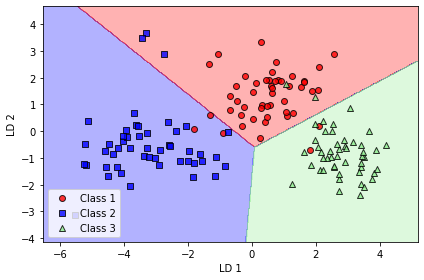

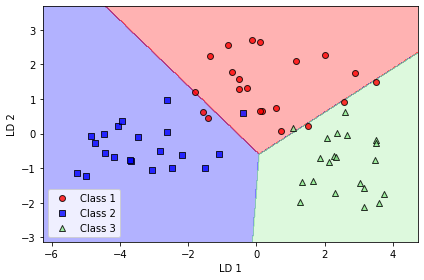

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    imputed_data, y, test_size=0.3, stratify=y, random_state=0)

scaler = StandardScaler()

X_train_std = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

X_test_std = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

lr = lr.fit(X_train_lda, y_train)

plt.figure()
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.figure()
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

We can see the classifier results are a little bit worse for the imputed data in comparison with the original data. However, the difference is not highly noticeable. So, the results are good enough regarding the fact that some cells has been missing and then replaced with new values.